# Token Frequency Feature

## Set Up

In [1]:
import torch

from find_feature import find_token_frequency_feature

In [2]:
SAVE_FEATURE_VECTORS = False  # Setting to True will overwrite the currently saved vectors
FEATURE_VECTORS_PATH = "feature_vectors/"

TOKEN_COUNTS_PATH_TEMPLATE =\
    "token_counts/openwebtext_train_{model_family}_token_counts.json"

MODELS = [
    # (model_id, model_name, model_family),
    ("gpt2", "GPT 2 - Small", "gpt2"),
    ("gpt2-medium", "GPT 2 - Medium", "gpt2"),
    ("gpt2-large", "GPT 2 - Large", "gpt2"),
    ("gpt2-xl", "GPT 2 - XL", "gpt2"),
    ("meta-llama/Meta-Llama-3-8B", "Llama 3 - 8B", "llama3"),
    ("meta-llama/Meta-Llama-3-8B-Instruct", "Llama 3 - 8B Instruct", "llama3"),
    ("meta-llama/Meta-Llama-3-70B", "Llama 3 - 70B", "llama3"),
    ("meta-llama/Meta-Llama-3-70B-Instruct", "Llama 3 - 70B Instruct", "llama3"),
    ("mistralai/Mistral-7B-v0.3", "Mistral 7B", "mistral"),
    ("mistralai/Mixtral-8x7B-v0.1", "Mixtral 8x7B", "mixtral"),
    ("google/gemma-2b", "Gemma 2B", "gemma"),
    ("google/gemma-7b", "Gemma 7B", "gemma"),
    ("google/codegemma-2b", "CodeGemma 2B", "gemma"),
    ("google/codegemma-7b", "CodeGemma 7B", "gemma"),
    ("google/codegemma-7b-it", "CodeGemma 7B Instruct", "gemma"),
    ("microsoft/Phi-3-mini-4k-instruct", "Phi 3 - Mini", "phi3"),
    ("microsoft/Phi-3-small-8k-instruct", "Phi 3 - Small", "phi3-small"),
    ("microsoft/Phi-3-medium-4k-instruct", "Phi 3 - Medium", "phi3"),
]
TIED_WEIGHTS_MODELS = [
    "gpt2",
    "gpt2-medium",
    "gpt2-large",
    "gpt2-xl",
    "google/gemma-2b",
    "google/gemma-7b",
    "google/codegemma-2b",
    "google/codegemma-7b",
    "google/codegemma-7b-it",
    "microsoft/Phi-3-small-8k-instruct",
]

## Replicable Results

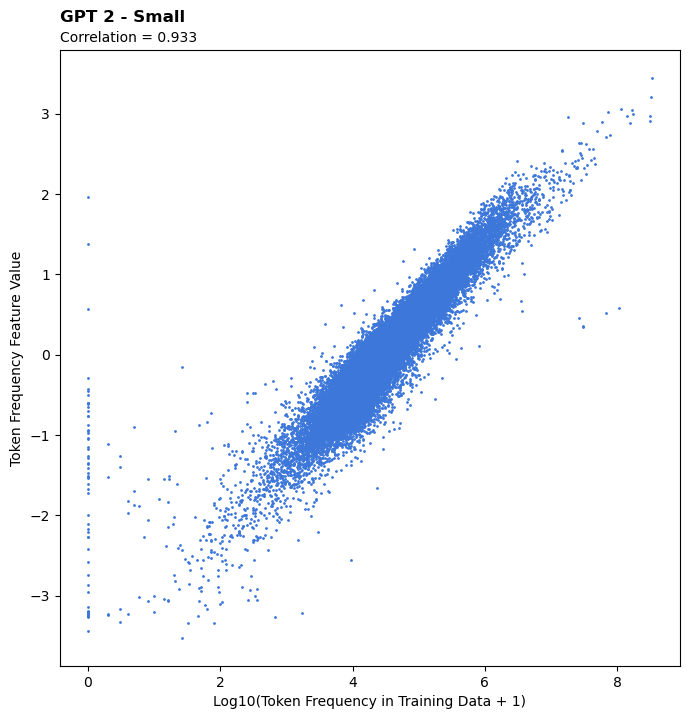

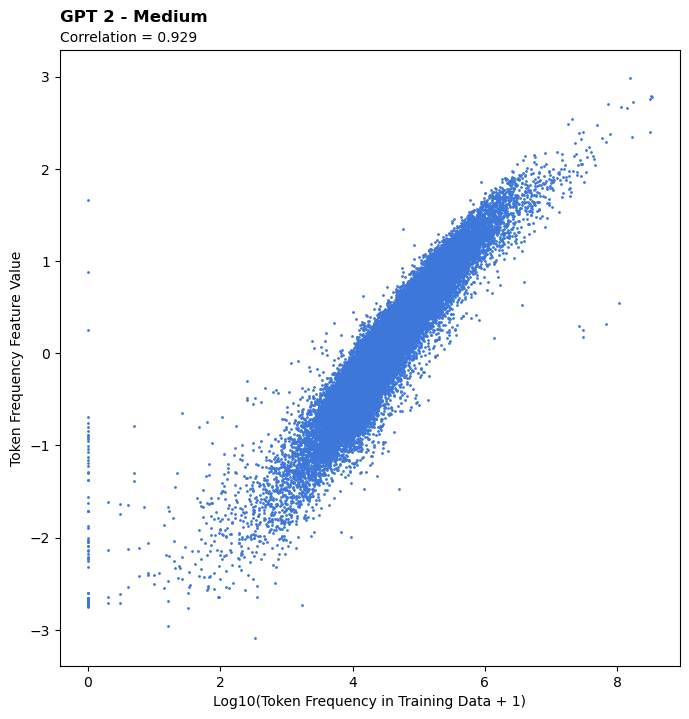

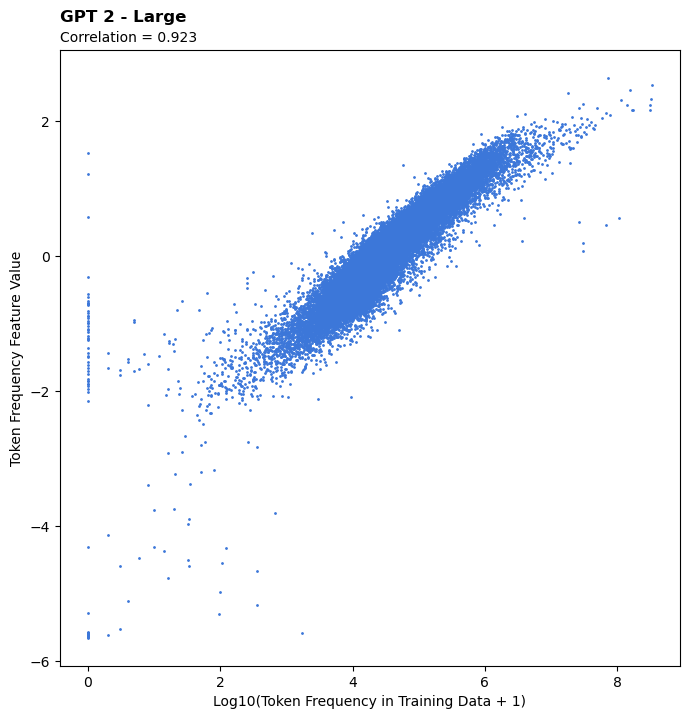

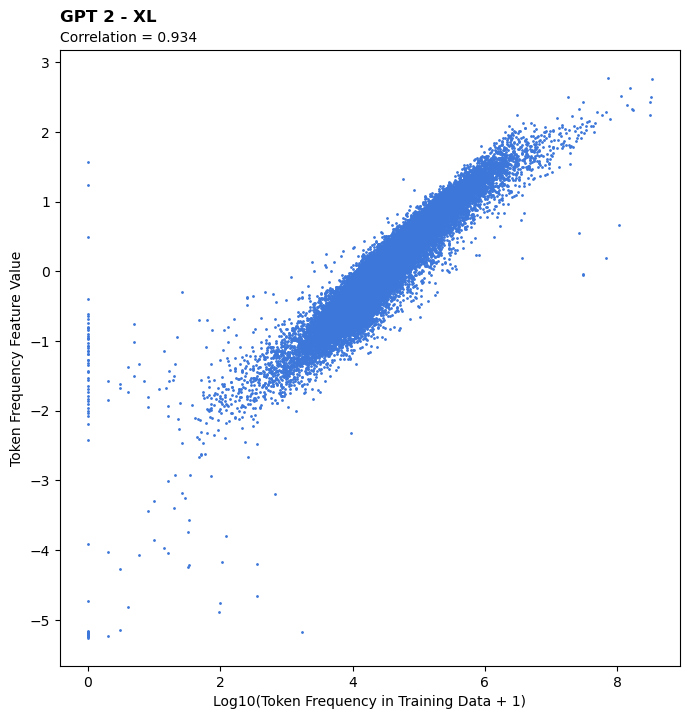

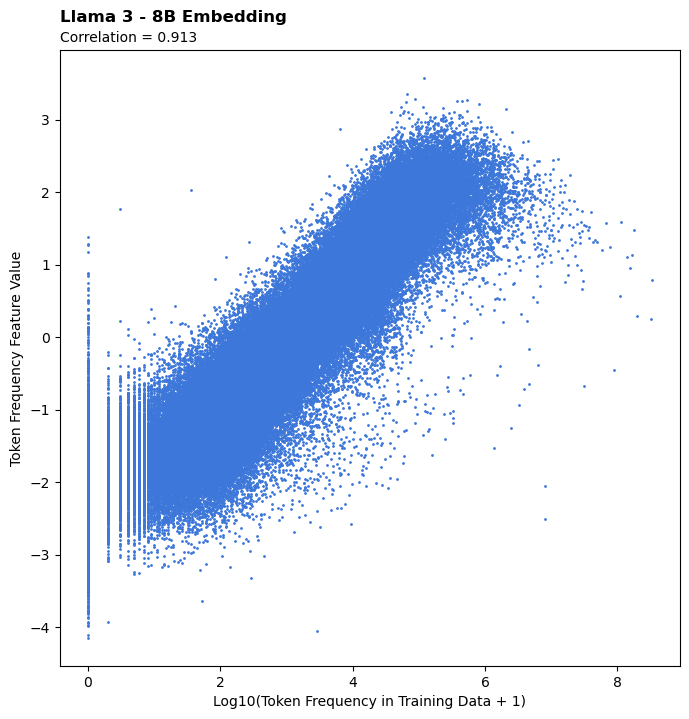

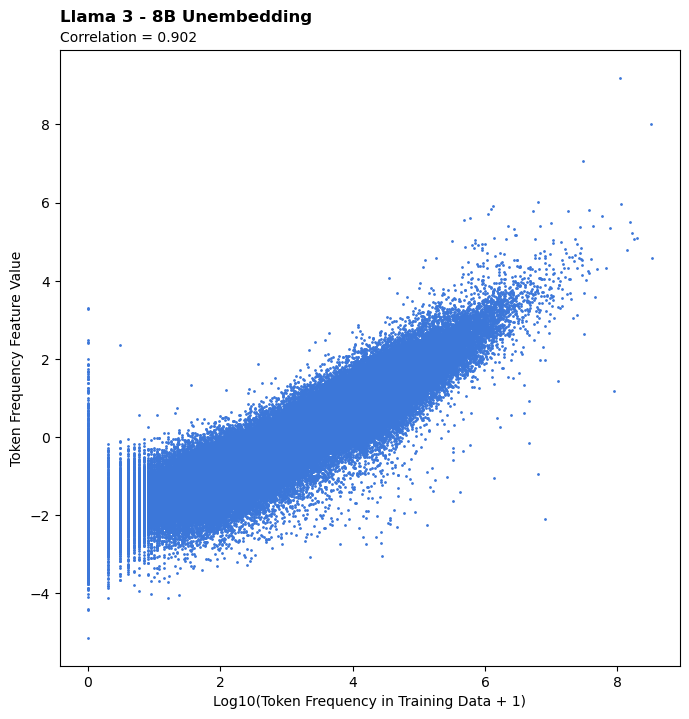

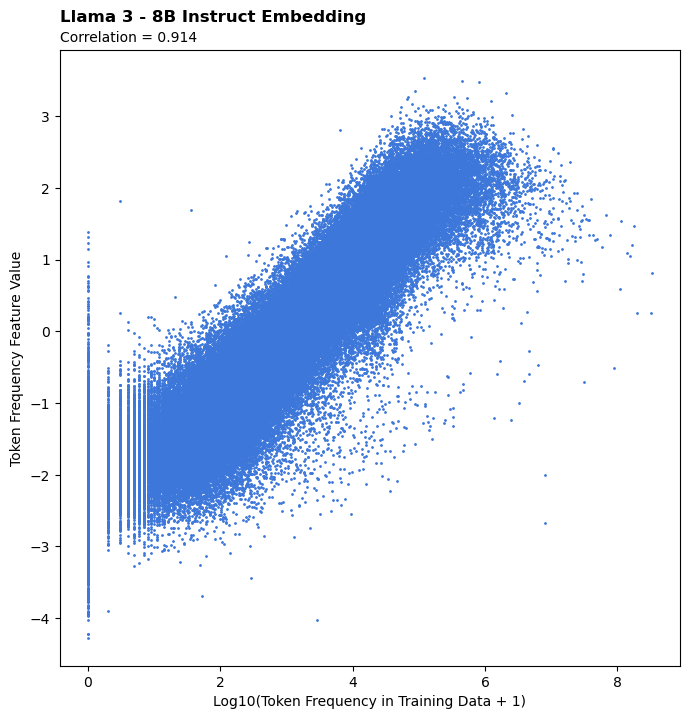

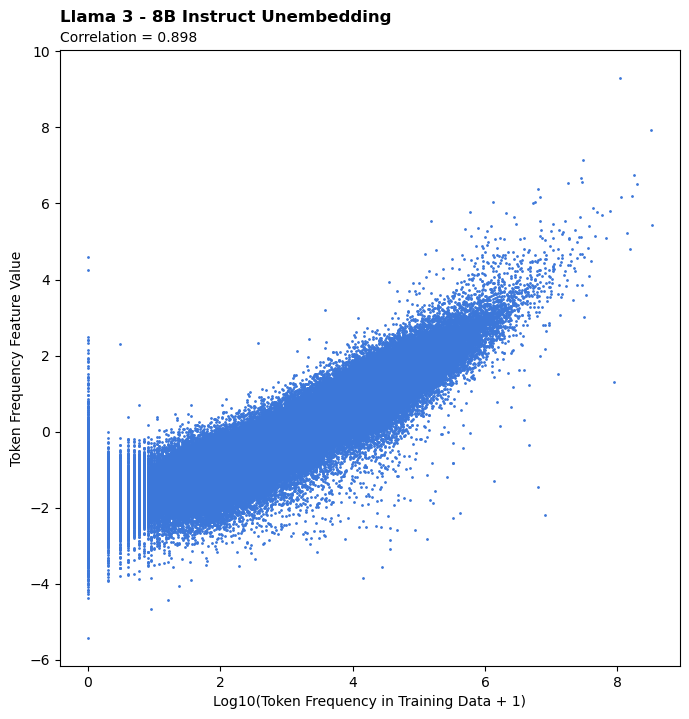

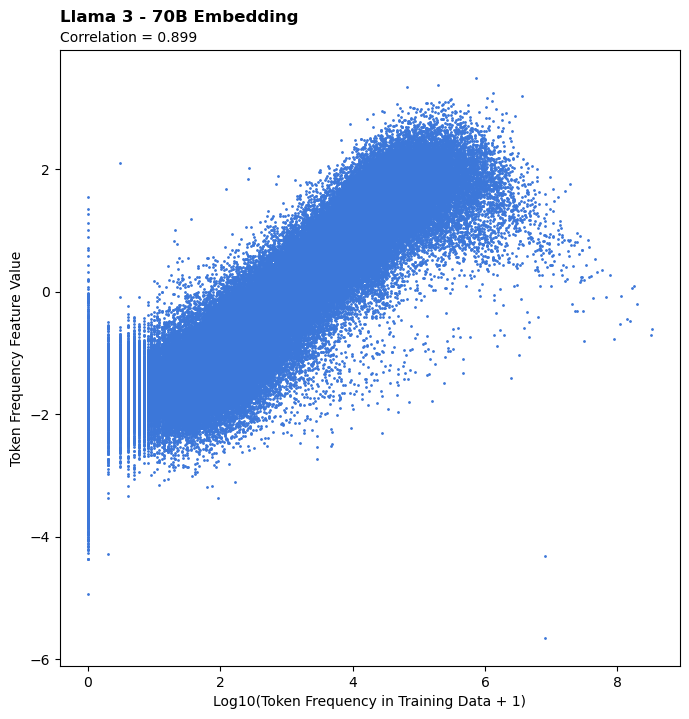

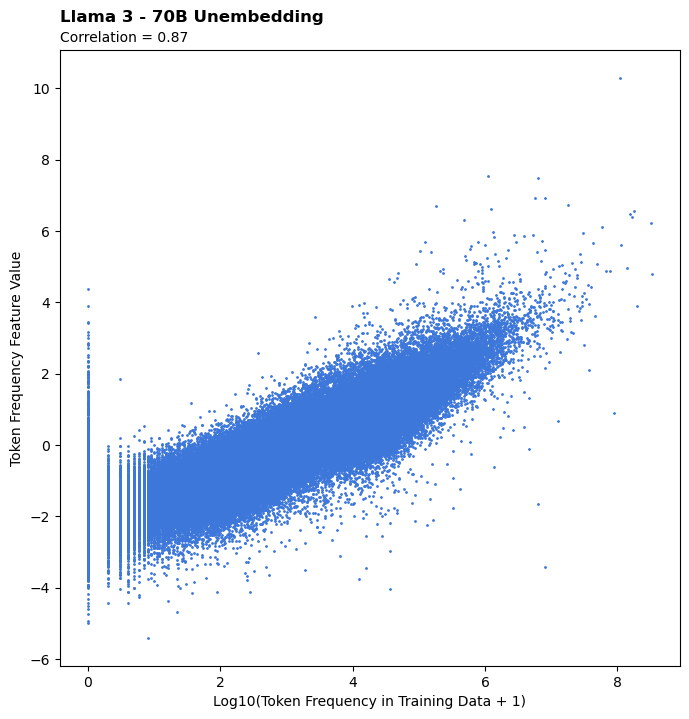

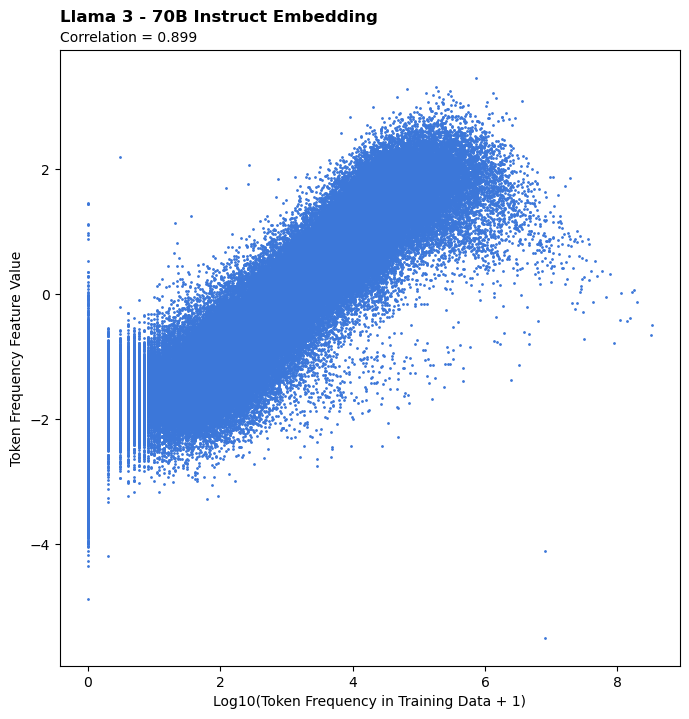

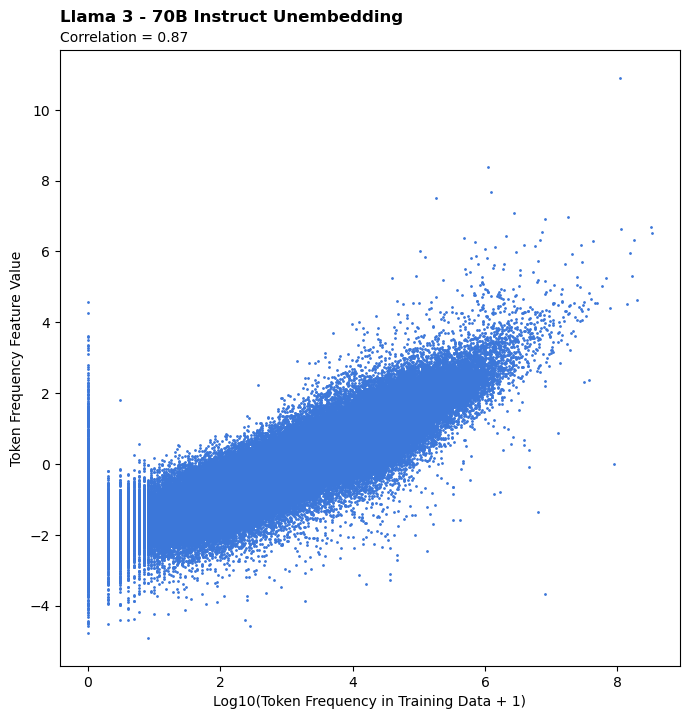

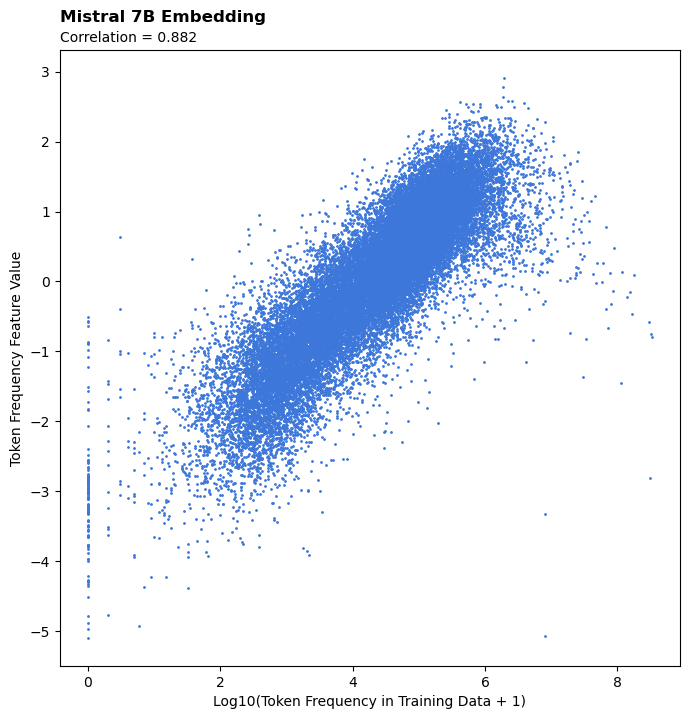

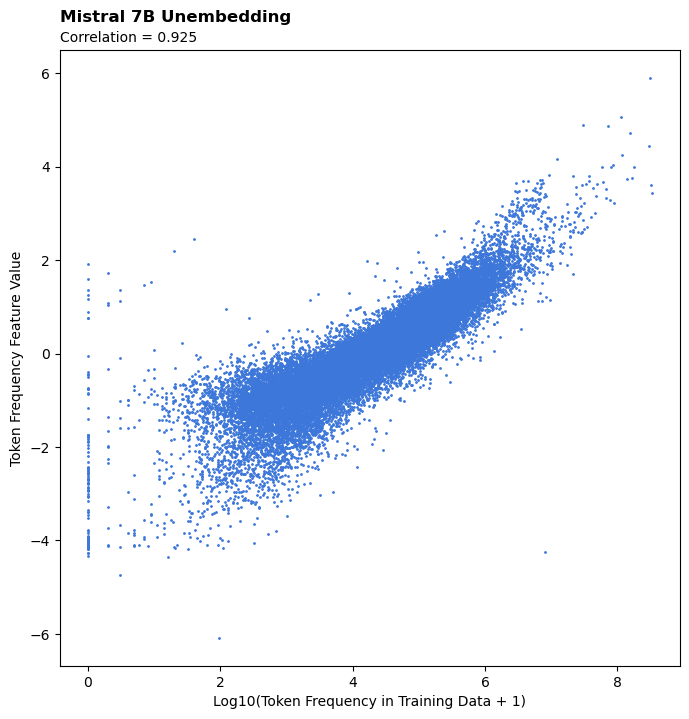

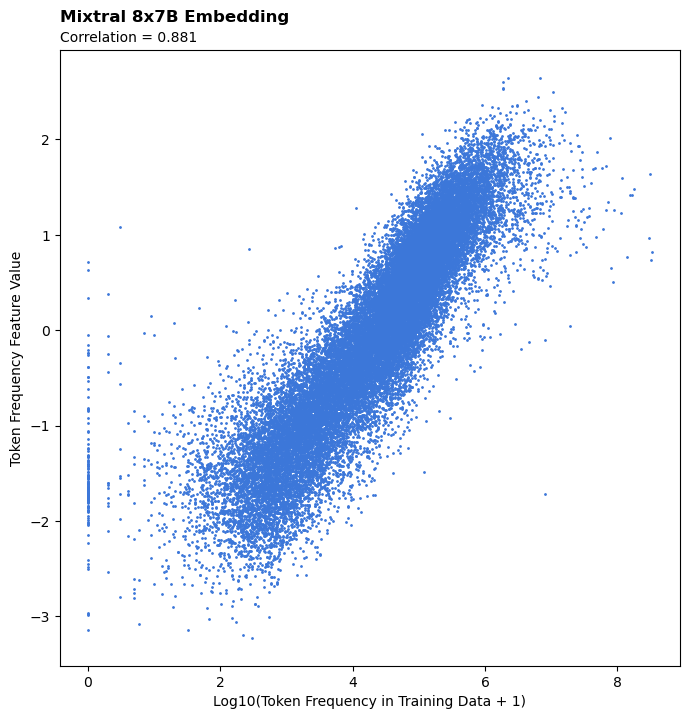

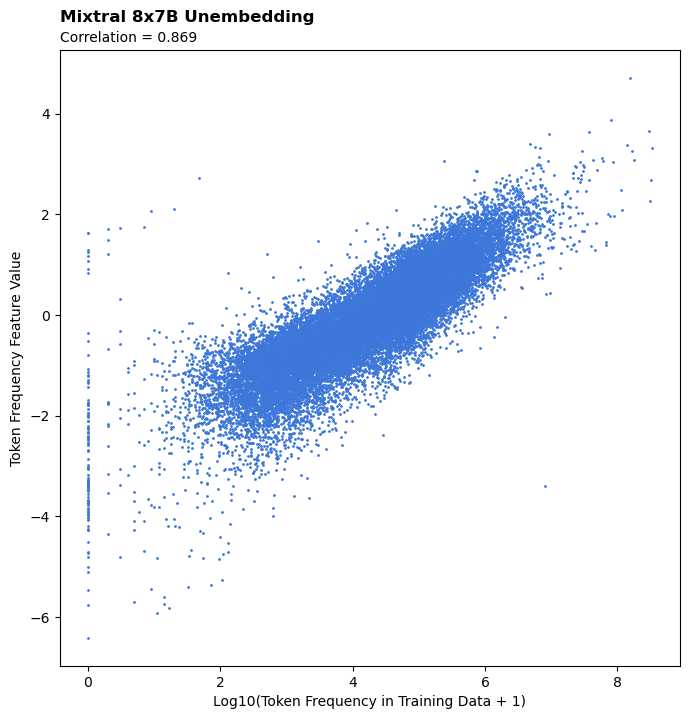

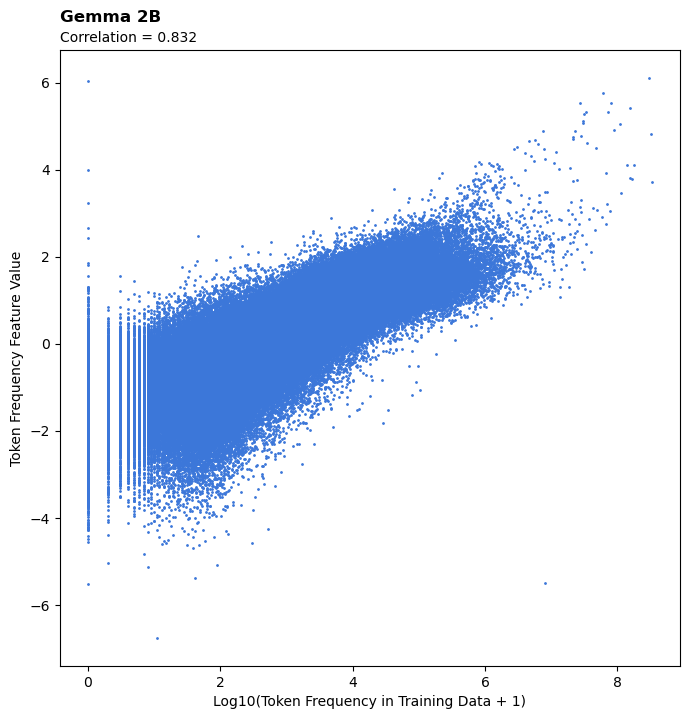

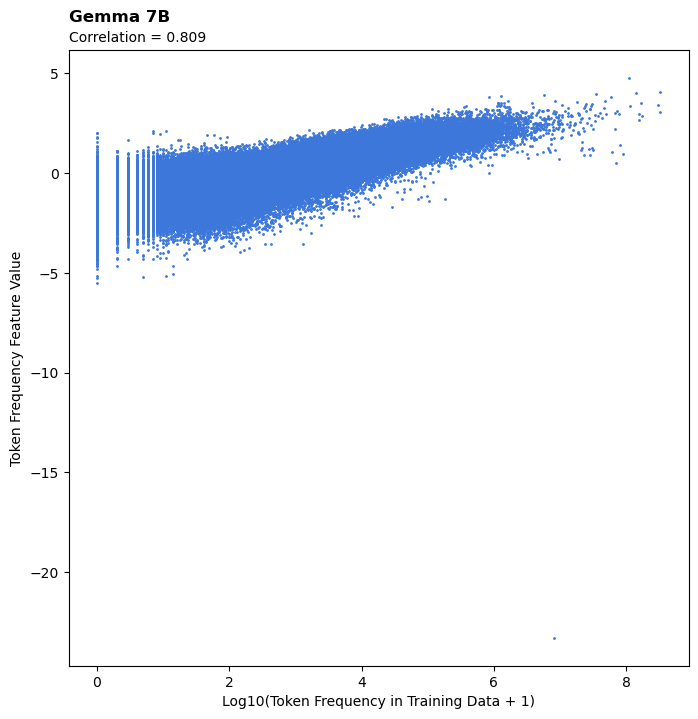

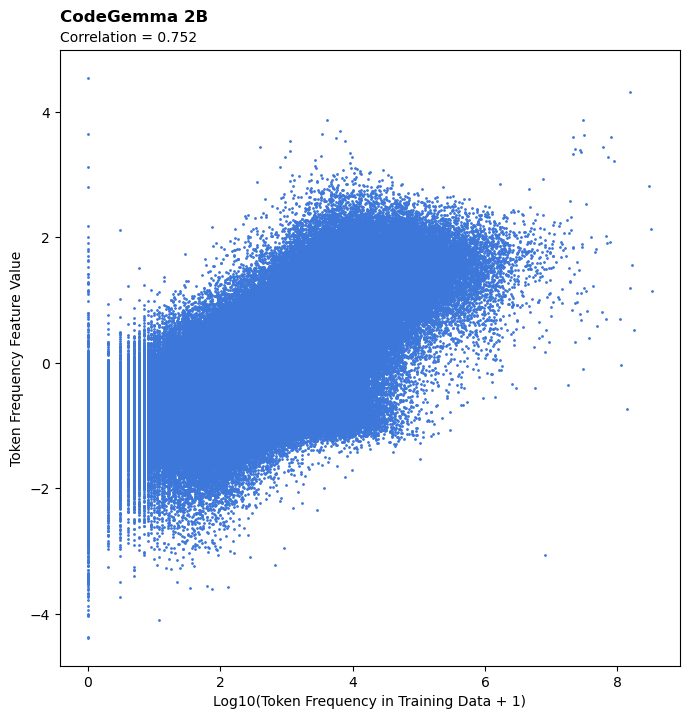

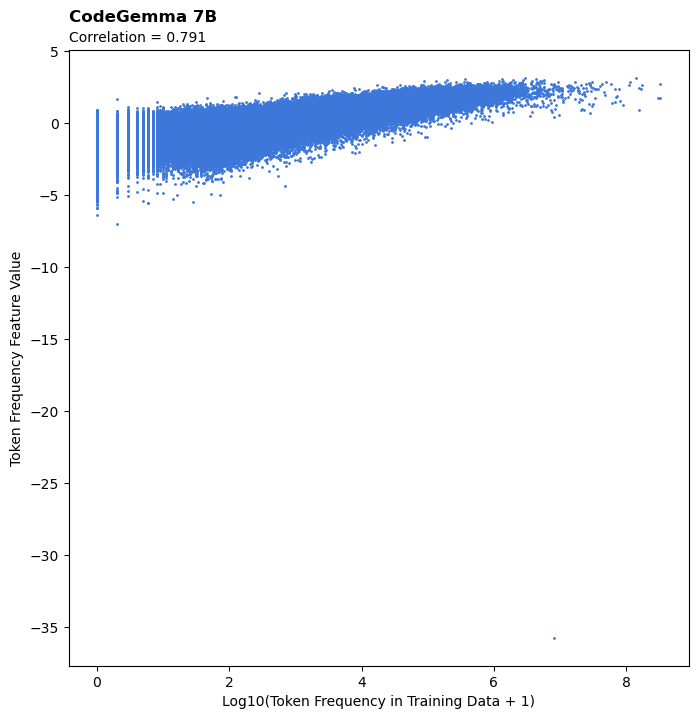

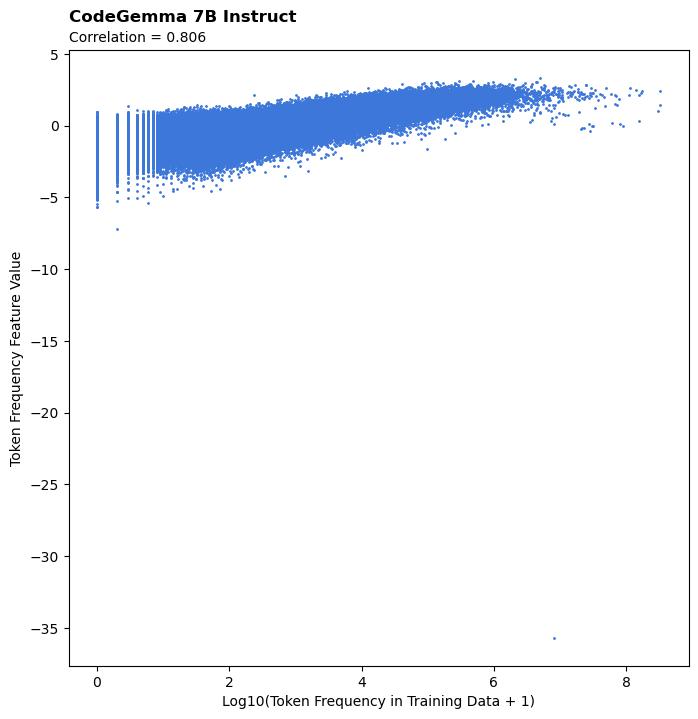

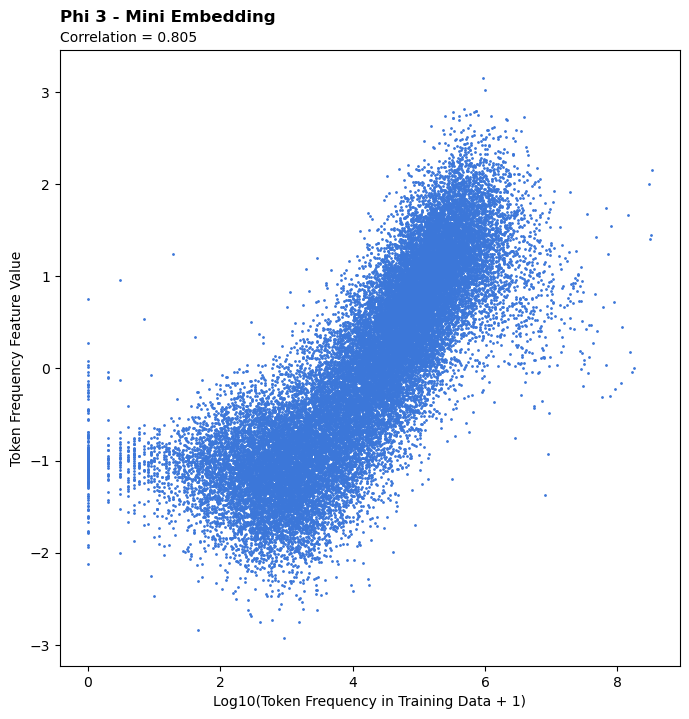

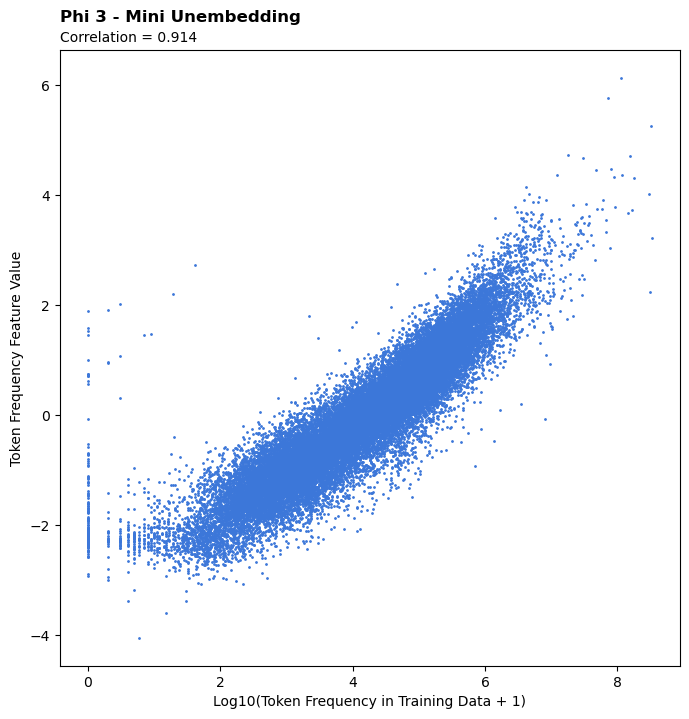

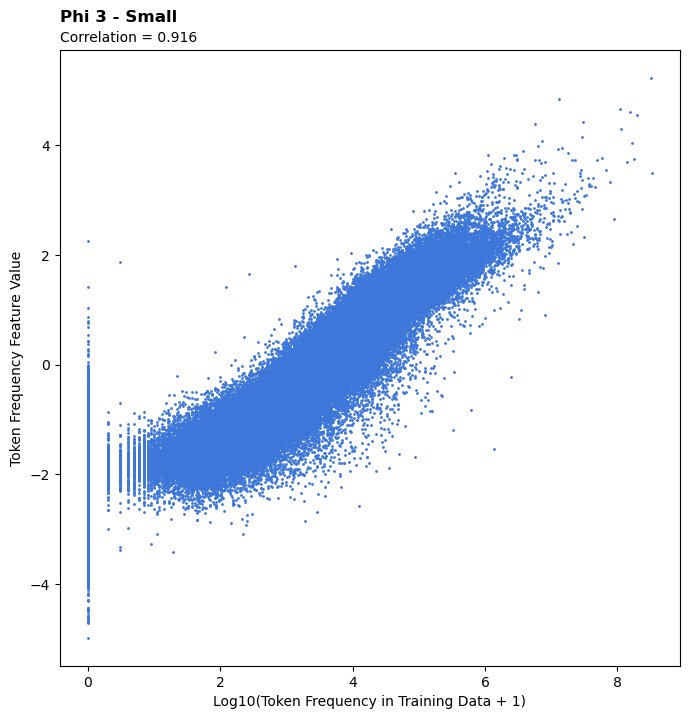

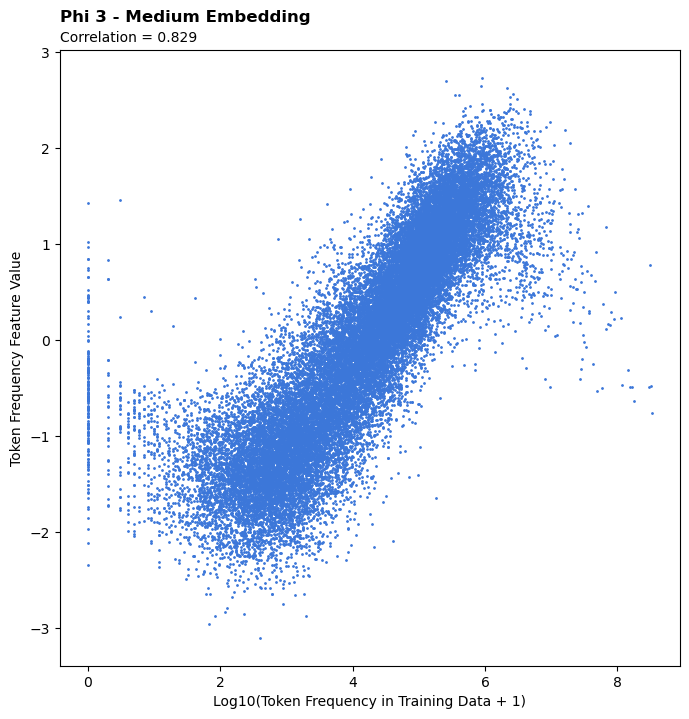

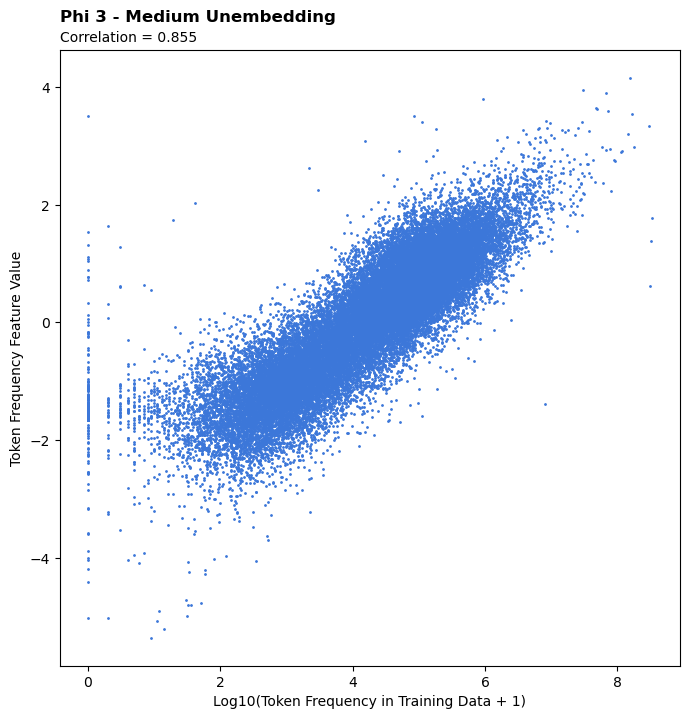

In [5]:
for model_id, model_name, model_family in MODELS:
    token_counts_path =\
        TOKEN_COUNTS_PATH_TEMPLATE.format(model_family=model_family)
    
    for model_part in ["embed", "unembed"]:
        if model_part == "unembed" and model_id in TIED_WEIGHTS_MODELS:
            continue  # Skip the below

        plot_title = model_name
        if model_id not in TIED_WEIGHTS_MODELS:
            plot_title += " " + model_part.capitalize() + "ding"
        
        feature_vector, df = find_token_frequency_feature(
            model_id=model_id,
            unembedding=(model_part == "unembed"),
            token_counts_path=token_counts_path,
            plot_result=True,
            plot_title=plot_title
        )

        if SAVE_FEATURE_VECTORS:
            file_name = model_id.split("/")[-1] + f"-{model_part}.pt"
            torch.save(feature_vector, FEATURE_VECTORS_PATH + file_name)


## NOT (Easily) Replicable Results

### nanoGPT: Character Level Shakespeare

(Known Training Data Experiment)

NOT easily replicable because the trained nanoGPT models are too large to put on GitHub and would need to be trained from scratch. For completeness, results still shown here.

#### Set Up

In [6]:
# from model import GPTConfig, GPT  # from nanoGPT model.py file
# import os

# REPO_PATH = os.path.join(os.getenv("HOME"), "GitHub/Cloned/nanoGPT")

# def load_nanoGPT_model_part(
#     tied_weights=True,
#     model_part="embed",
#     device="cpu"
# ):
#     assert model_part in ("embed", "unembed")

#     # Load saved model checkpoint:
#     if tied_weights:
#         out_dir = "out-shakespeare-char"
#     else:
#         out_dir = "out-shakespeare-char-outbedding-not-tied"

#     ckpt_path = os.path.join(REPO_PATH, out_dir, "ckpt.pt")
#     checkpoint = torch.load(ckpt_path, map_location=device)

#     # Initialize model without weights:
#     config = GPTConfig(**checkpoint["model_args"])
#     model = GPT(config)

#     # Clean state_dict (weights):
#     state_dict = checkpoint["model"]
#     unwanted_prefix = "_orig_mod."
#     for k, v in list(state_dict.items()):
#         if k.startswith(unwanted_prefix):
#             state_dict[k[len(unwanted_prefix):]] = state_dict.pop(k)
    
#     # Load weights into model:
#     model.load_state_dict(state_dict)

#     if model_part == "embed" or tied_weights:
#         return model.transformer.wte.weight
#     else:  # "unembed"
#         return model.lm_head.weight


#### Tied Weights

number of parameters: 10.65M


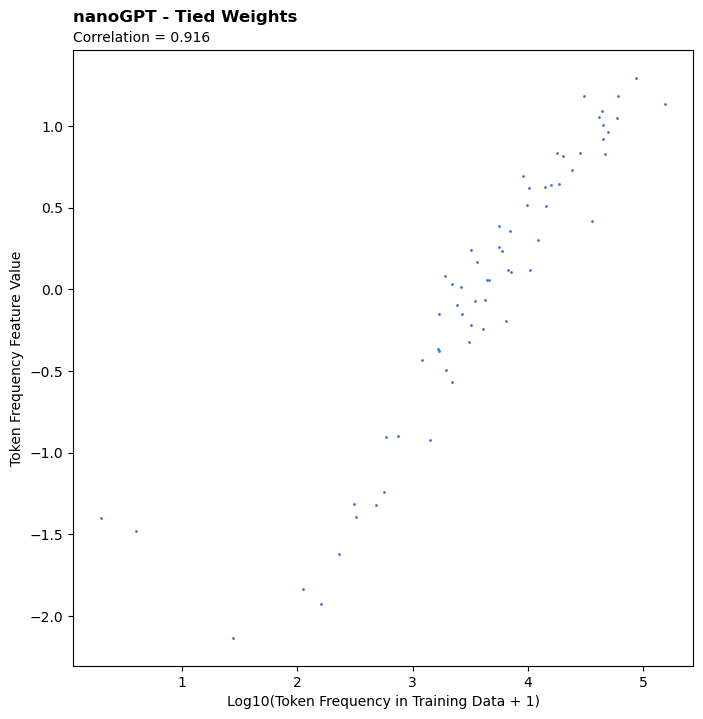

In [7]:
# model_id = "nanoGPT-tied-weights"
# model_name = "nanoGPT - Tied Weights"
# tied_weights = True
# token_counts_path = "token_counts/shakespeare_char_train_token_counts.json"

# for model_part in ["embed", "unembed"]:
#     if model_part == "unembed" and tied_weights:
#         continue  # Skip the below

#     plot_title = model_name
#     if not tied_weights:
#         plot_title += " " + model_part.capitalize() + "ding"
    
#     feature_vector, df = find_token_frequency_feature(
#         model_id=model_id,
#         unembedding=(model_part == "unembed"),
#         token_counts_path=token_counts_path,
#         plot_result=True,
#         plot_title=plot_title,
#         _embedding_matrix=load_nanoGPT_model_part(
#             tied_weights=tied_weights,
#             model_part=model_part
#         )
#     )

#     if SAVE_FEATURE_VECTORS:
#         file_name = model_id.split("/")[-1] + f"-{model_part}.pt"
#         torch.save(feature_vector, FEATURE_VECTORS_PATH + file_name)

#### Weights NOT Tied

number of parameters: 10.67M


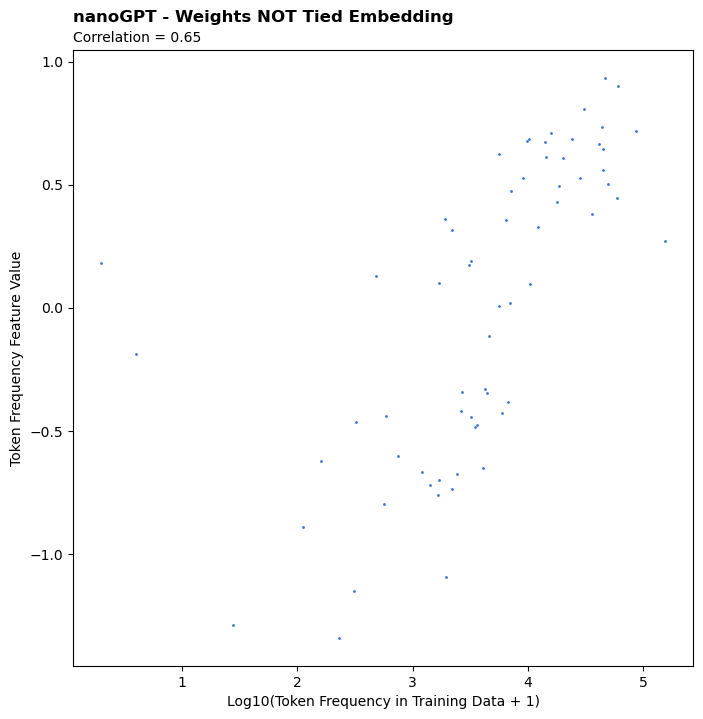

number of parameters: 10.67M


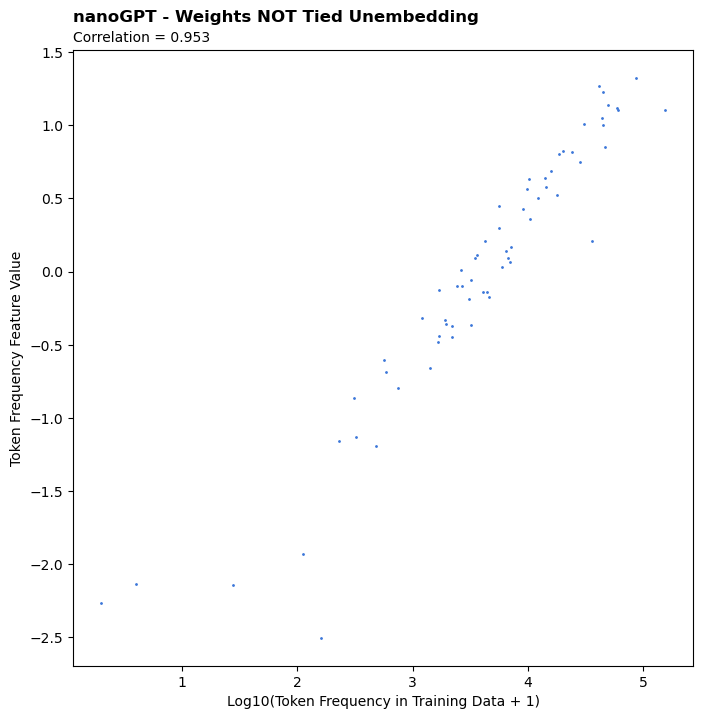

In [10]:
# model_id = "nanoGPT-weights-not-tied"
# model_name = "nanoGPT - Weights NOT Tied"
# tied_weights = False
# token_counts_path = "token_counts/shakespeare_char_train_token_counts.json"

# for model_part in ["embed", "unembed"]:
#     if model_part == "unembed" and tied_weights:
#         continue  # Skip the below

#     plot_title = model_name
#     if not tied_weights:
#         plot_title += " " + model_part.capitalize() + "ding"
    
#     feature_vector, df = find_token_frequency_feature(
#         model_id=model_id,
#         unembedding=(model_part == "unembed"),
#         token_counts_path=token_counts_path,
#         plot_result=True,
#         plot_title=plot_title,
#         _embedding_matrix=load_nanoGPT_model_part(
#             tied_weights=tied_weights,
#             model_part=model_part
#         )
#     )

#     if SAVE_FEATURE_VECTORS:
#         file_name = model_id.split("/")[-1] + f"-{model_part}.pt"
#         torch.save(feature_vector, FEATURE_VECTORS_PATH + file_name)